## Análisis exploratorio datos preparados.

El proposito de este notebook es utilizar el dataset generado en el primer proceso de preparación de datos para realizar analisis exploratorio en los datos, graficas, correlaciones y poder establecer tecnicas para el uso o arreglo de datos.

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Extracción datos.

In [118]:
URL_PREPARED_DATA = 'Prepared_Data'
FILE_NAME = 'siniestros-prepared.csv'

In [119]:
dfsiniestros = pd.read_csv(URL_PREPARED_DATA+'/'+FILE_NAME)
# revisar columnas (4,26) 

/home/ubuntu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Cantidad de datos.

In [120]:
dfsiniestros.shape

(203191, 28)

### Validación de datos.
1.  Validamos los tipos de datos de cada columna.
2.  Validamos la cantidad de valores nan por cada columna.

In [121]:
dfsiniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203191 entries, 0 to 203190
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    203191 non-null  int64  
 1   KEYID                         203191 non-null  int64  
 2   FECHA                         203191 non-null  object 
 3   DIA_PROCESADO                 203191 non-null  object 
 4   EDAD_PROCESADA                202187 non-null  object 
 5   LLEVACINTURON                 163989 non-null  object 
 6   LLEVACHALECO                  34724 non-null   object 
 7   LLEVACASCO                    34546 non-null   object 
 8   SEXO                          203191 non-null  object 
 9   GRAVEDAD_PROCESADA            203191 non-null  object 
 10  MODELOVEHICULO                194044 non-null  float64
 11  CLASEVEHICULO                 201342 non-null  object 
 12  SERVICIOVEHICULO              194310 non-nul

In [122]:
for column in dfsiniestros.columns:
    if (dfsiniestros[column].isna().sum()):
        print(f'Columna {column} tienen {dfsiniestros[column].isna().sum()} registros en nan')

Columna EDAD_PROCESADA tienen 1004 registros en nan
Columna LLEVACINTURON tienen 39202 registros en nan
Columna LLEVACHALECO tienen 168467 registros en nan
Columna LLEVACASCO tienen 168645 registros en nan
Columna MODELOVEHICULO tienen 9147 registros en nan
Columna CLASEVEHICULO tienen 1849 registros en nan
Columna SERVICIOVEHICULO tienen 8881 registros en nan
Columna TIPOFALLA tienen 9138 registros en nan
Columna CHOQUECODIGO tienen 15987 registros en nan


### Remplazo de valores vacios *(na)*
- Columna Edad:
    - Se remplaza los valores ```SIN INFORMACION``` en la columna *```EDAD_PROCESADA```*.
    - Se remplaza los valores ```NaN``` en la columna *```EDAD_PROCESADA```*.

In [123]:
edadlimpia = dfsiniestros[dfsiniestros['EDAD_PROCESADA'] !='SIN INFORMACION'][['EDAD_PROCESADA','SEXO']].dropna()
edadlimpia['EDAD_PROCESADA'] = edadlimpia['EDAD_PROCESADA'].astype(float)

In [124]:
proedades = edadlimpia.groupby(['SEXO'])['EDAD_PROCESADA'].describe()[['mean','count']].reset_index()
#prueba.columns = prueba.columns.droplevel(0)
print('Promedio Edades Agrupado por SEXO:')
print(proedades)

Promedio Edades Agrupado por SEXO:
        SEXO       mean     count
0   FEMENINO  38.168366   20984.0
1  MASCULINO  38.187396  177757.0
2  NO APLICA  40.560914     394.0


In [125]:
print('Moda Edades Agrupado por SEXO:')
moedmasculino = edadlimpia[edadlimpia['SEXO'] == 'MASCULINO'].mode()
print(moedmasculino)
moedfemenino = edadlimpia[edadlimpia['SEXO'] == 'FEMENINO'].mode()
print(moedfemenino)
moednoaplica = edadlimpia[edadlimpia['SEXO'] == 'NO APLICA'].mode()
print(moednoaplica)

Moda Edades Agrupado por SEXO:
   EDAD_PROCESADA       SEXO
0            27.0  MASCULINO
   EDAD_PROCESADA      SEXO
0            37.0  FEMENINO
   EDAD_PROCESADA       SEXO
0            37.0  NO APLICA


#### Conclusion para poblar valores *(na)* campo ```EDAD_PROCESADA```
Como se observo en las anteriores operaciones donde se extrajeron los valores promedio y moda de los valores que actualmente tiene este campo, para contribuir a que la distribucion de los datos se mantengan agrupados por ```SEXO``` se utilizaran los siguientes valores:

- MASCULINO: Se utilizara la moda ```27```
- FEMENINO: Se utilizara el promedio ```38```
- NO APLICA: Se utilizara el promedio ```40```

*Nota: Se toma la decisión de usar estadisticos para la cada ```SEXO``` para que los datos no quedaran planos y nos afectaran la distribucion.*

In [126]:
edadmasculino = round(moedmasculino['EDAD_PROCESADA'].get(0),0)
edadmasculino

27.0

In [127]:
edadfemenino = round(proedades[proedades['SEXO'] == 'FEMENINO']['mean'].values[0],0)
edadfemenino

38.0

In [128]:
edadnoaplica = round(proedades[proedades['SEXO'] == 'NO APLICA']['mean'].values[0],0)
edadnoaplica

41.0

### Eliminación valores
- Columna __EDAD_PROCESADA__  ```SIN INFORMACION```
- Columna __SEXO__  ```NO APLICA```
Total eliminaciones ```4450``` Registros

In [129]:
dfsiniestros.shape

(203191, 28)

In [130]:
# Elimina registros de EDAD_PROCESADA
dfsiniestros.drop(dfsiniestros[(dfsiniestros['EDAD_PROCESADA'].isna() ) | (dfsiniestros['EDAD_PROCESADA'] == 'SIN INFORMACION') ].index,  inplace=True) 

In [131]:
#Elimina registros de SEXO
dfsiniestros.drop(dfsiniestros[dfsiniestros['SEXO'] == 'NO APLICA'].index, inplace=True)

In [132]:
dfsiniestros.shape

(198741, 28)

Remplazo de Valores ```na``` columna ```EDAD_PROCESADA```

In [133]:
dfsiniestros.loc[((dfsiniestros['SEXO'] == 'MASCULINO') & (dfsiniestros['EDAD_PROCESADA'].isna())),'EDAD_PROCESADA'] = edadmasculino 

In [134]:
dfsiniestros.loc[((dfsiniestros['SEXO'] == 'FEMENINO') & (dfsiniestros['EDAD_PROCESADA'].isna())),'EDAD_PROCESADA'] = edadfemenino 

In [135]:
dfsiniestros.loc[((dfsiniestros['SEXO'] == 'NO APLICA') & (dfsiniestros['EDAD_PROCESADA'].isna())),'EDAD_PROCESADA'] = edadnoaplica 

Remplazo de Valores ```'Sin Informacion'``` columna ```EDAD_PROCESADA```

In [136]:
dfsiniestros.loc[((dfsiniestros['SEXO'] == 'MASCULINO') & (dfsiniestros['EDAD_PROCESADA'] == 'SIN INFORMACION')),'EDAD_PROCESADA'] = edadmasculino 

In [137]:
dfsiniestros.loc[((dfsiniestros['SEXO'] == 'FEMENINO') & (dfsiniestros['EDAD_PROCESADA'] == 'SIN INFORMACION')),'EDAD_PROCESADA'] = edadfemenino 

In [138]:
dfsiniestros.loc[((dfsiniestros['SEXO'] == 'NO APLICA') & (dfsiniestros['EDAD_PROCESADA'] == 'SIN INFORMACION')),'EDAD_PROCESADA'] = edadnoaplica 

Validación de tipos de datos en la columna ```EDAD_PROCESADA```

Se convierten todos los tipos de datos de columna ```EDAD_PROCESADA```

In [139]:
dfsiniestros['EDAD_PROCESADA'] = dfsiniestros['EDAD_PROCESADA'].astype('float')
dfsiniestros['EDAD_PROCESADA'] = dfsiniestros['EDAD_PROCESADA'].astype('int64')

## VALIDAR ELIMINACIONES```TIPO_DISENNO```

In [140]:
del dfsiniestros['TIPODISENNO']

In [141]:
del dfsiniestros['TIPOFALLA']

In [142]:
del dfsiniestros['KEYID']

In [143]:
del dfsiniestros['Unnamed: 0']

In [144]:
del dfsiniestros['CON_BICICLETA']

- Columna __LLEVACINTURON__:
    - Se remplaza los valores ```NaN``` en la columna *```LLEVACINTURON```* con ```0``` este siendo una variable de categoria y el  ```0``` significando que para el siniestro no aplica esta categoria.

In [145]:
dfsiniestros['LLEVACINTURON'].fillna('0', inplace=True)
dfsiniestros['LLEVACINTURON'].value_counts(dropna=False)

S    149429
0     35106
N     14206
Name: LLEVACINTURON, dtype: int64

- Columna __LLEVACHALECO__:
    - Se remplaza los valores ```NaN``` en la columna __*```LLEVACHALECO```*__ con ```0``` este siendo una variable de categoria y el  ```0``` significando que para el siniestro no aplica esta categoria.

In [146]:
dfsiniestros['LLEVACHALECO'].fillna('0', inplace=True)
dfsiniestros['LLEVACHALECO'].value_counts(dropna=False)

0    164099
S     25383
N      9259
Name: LLEVACHALECO, dtype: int64

- Columna __LLEVACASCO__:
    - Se remplaza los valores ```NaN``` en la columna __*```LLEVACASCO```*__ con ```0``` este siendo una variable de categoria y el  ```0``` significando que para el siniestro no aplica esta categoria.

In [147]:
dfsiniestros['LLEVACASCO'].fillna('0', inplace=True)
dfsiniestros['LLEVACASCO'].value_counts(dropna=False)

0    164276
S     29446
N      5019
Name: LLEVACASCO, dtype: int64

- Columna __SERVICIOVEHICULO__:
    - Se remplaza los valores ```NaN``` en la columna __*```SERVICIOVEHICULO```*__ con ```0``` este siendo una variable de categoria y el  ```0``` significando que para el siniestro no aplica esta categoria.

In [148]:
dfsiniestros['SERVICIOVEHICULO'].fillna('Particular', inplace=True)
dfsiniestros['SERVICIOVEHICULO'].value_counts(dropna=False)

Particular    119983
Publico        75100
Oficial         3658
Name: SERVICIOVEHICULO, dtype: int64

- Columna __VEHICULO_VIAJABA_CLASIFICADO__:
    - Se remplaza los valores ```NaN``` en la columna __*```VEHICULO_VIAJABA_CLASIFICADO```*__ con ```0``` este siendo una variable de categoria y el  ```0``` significando que para el siniestro no aplica esta categoria.

In [149]:
dfsiniestros['VEHICULO_VIAJABA_CLASIFICADO'].value_counts(dropna=False)

LIVIANO                    97317
TRANSPORTE DE PASAJEROS    28313
MOTOCICLETA                28037
TAXI                       22423
CARGA                      15673
BICICLETA                   6978
Name: VEHICULO_VIAJABA_CLASIFICADO, dtype: int64

- Columna __CLASEVEHICULO__:
    - Se remplaza los valores ```NaN``` en la columna __*```CLASEVEHICULO```*__ con ```0``` este siendo una variable de categoria y el  ```0``` significando que para el siniestro no aplica esta categoria.

In [150]:
dfsiniestros['CLASEVEHICULO'].fillna('Automovil', inplace=True)
dfsiniestros['CLASEVEHICULO'].value_counts(dropna=False)

Automovil         83351
Motocicleta       28035
Camioneta         27880
Bus               20068
Camion, Furgon    10931
Campero            8470
Bicicleta          6948
Microbus           5388
Buseta             2857
Tractocamion       2799
Volqueta           1943
Motocarro            35
Bicitaxi             30
Motociclo             4
Cuatrimoto            2
Name: CLASEVEHICULO, dtype: int64

- Columna __CHOQUECODIGO__:
    - Se remplaza los valores ```NaN``` en la columna __*```CHOQUECODIGO```*__ con ```0``` este siendo una variable de categoria y el  ```0``` significando que para el siniestro no aplica esta categoria.

In [151]:
dfsiniestros['CHOQUECODIGO'].fillna('0', inplace=True)
dfsiniestros['CHOQUECODIGO'].value_counts(dropna=False)

1.0    179625
0       14825
4.0      3963
5.0       207
3.0        74
2.0        47
Name: CHOQUECODIGO, dtype: int64

- Columna __MODELOVEHICULO__:
    - Se remplaza los valores ```NaN``` en la columna *```MODELOVEHICULO```* con la moda de los valores correctos.

In [152]:
dfsiniestros['MODELOVEHICULO'].fillna(2014.0, inplace=True)

In [153]:
dfsiniestros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198741 entries, 0 to 203190
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   FECHA                         198741 non-null  object 
 1   DIA_PROCESADO                 198741 non-null  object 
 2   EDAD_PROCESADA                198741 non-null  int64  
 3   LLEVACINTURON                 198741 non-null  object 
 4   LLEVACHALECO                  198741 non-null  object 
 5   LLEVACASCO                    198741 non-null  object 
 6   SEXO                          198741 non-null  object 
 7   GRAVEDAD_PROCESADA            198741 non-null  object 
 8   MODELOVEHICULO                198741 non-null  float64
 9   CLASEVEHICULO                 198741 non-null  object 
 10  SERVICIOVEHICULO              198741 non-null  object 
 11  POSSESEGURORESPONSABILIDAD    198741 non-null  object 
 12  VEHICULO_VIAJABA_CLASIFICADO  198741 non-nul

### Conversion de tipos de datos por campo y categoricas  __```NUMERICAS```__.
En este paso se realizara lo siguiente:
   1. Por cada campo del ```dfsiniestros``` se convertira al tipo de dato que corresponde por naturaleza. __(Date,Float,Int)__
   2. Las variables categoricas ```alfanumericas``` se convertiran en categoricas ```numericas```.

#### Convertimos el campo __```FECHA```__ en datetime.

In [154]:
dfsiniestros['FECHA'] = dfsiniestros['FECHA'].astype('datetime64[ns]')

#### Convertimos el campo __```DIA_PROCESADO```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:
   1. LUNES
   2. MARTES
   3. MIÉRCOLES
   4. JUEVES
   5. VIERNES
   6. SÁBADO
   7. DOMINGO

In [155]:
dfsiniestros['DIA_PROCESADO'].replace('LUNES',1,inplace=True)
dfsiniestros['DIA_PROCESADO'].replace('MARTES',2,inplace=True)
dfsiniestros['DIA_PROCESADO'].replace('MIÉRCOLES',3,inplace=True)
dfsiniestros['DIA_PROCESADO'].replace('JUEVES',4,inplace=True)
dfsiniestros['DIA_PROCESADO'].replace('VIERNES',5,inplace=True)
dfsiniestros['DIA_PROCESADO'].replace('SÁBADO',6,inplace=True)
dfsiniestros['DIA_PROCESADO'].replace('DOMINGO',7,inplace=True)

#### Convertimos el campo __```LLEVACINTURON```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   0. NO APLICA
   1. SI
   2. NO

In [156]:
dfsiniestros['LLEVACINTURON'].replace('S',1,inplace=True)
dfsiniestros['LLEVACINTURON'].replace('N',2,inplace=True)
dfsiniestros['LLEVACINTURON'] = dfsiniestros['LLEVACINTURON'].astype('int64')

#### Convertimos el campo __```LLEVACHALECO```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   0. NO APLICA
   1. SI
   2. NO

In [157]:
dfsiniestros['LLEVACHALECO'].replace('S',1,inplace=True)
dfsiniestros['LLEVACHALECO'].replace('N',2,inplace=True)
dfsiniestros['LLEVACHALECO'] = dfsiniestros['LLEVACHALECO'].astype('int64')

#### Convertimos el campo __```LLEVACASCO```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   0. NO APLICA
   1. SI
   2. NO

In [158]:
dfsiniestros['LLEVACASCO'].replace('S',1,inplace=True)
dfsiniestros['LLEVACASCO'].replace('N',2,inplace=True)
dfsiniestros['LLEVACASCO'] = dfsiniestros['LLEVACASCO'].astype('int64')

#### Convertimos el campo __```SEXO```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   0. NO APLICA
   1. MASCULINO
   2. FEMENINO

In [159]:
dfsiniestros['SEXO'].replace('MASCULINO',1,inplace=True)
dfsiniestros['SEXO'].replace('FEMENINO',2,inplace=True)
dfsiniestros['SEXO'].replace('NO APLICA',0,inplace=True)
dfsiniestros['SEXO'] = dfsiniestros['SEXO'].astype('int64')

#### Convertimos el campo __```GRAVEDAD_PROCESADA```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   1. ILESA
   2. HERIDO VALORADO
   3. HERIDO HOSPITALIZADO
   4. MUERTA

In [160]:
dfsiniestros['GRAVEDAD_PROCESADA'].replace('ILESA',1,inplace=True)
dfsiniestros['GRAVEDAD_PROCESADA'].replace('HERIDO VALORADO',2,inplace=True)
dfsiniestros['GRAVEDAD_PROCESADA'].replace('HERIDO HOSPITALIZADO',3,inplace=True)
dfsiniestros['GRAVEDAD_PROCESADA'].replace('MUERTA',4,inplace=True)
dfsiniestros['GRAVEDAD_PROCESADA'] = dfsiniestros['GRAVEDAD_PROCESADA'].astype('int64')

#### Convertimos el campo __```MODELOVEHICULO```__ en  ```INT```.

In [161]:
dfsiniestros['MODELOVEHICULO'] = dfsiniestros['MODELOVEHICULO'].astype('int64')

#### Convertimos el campo __```CLASEVEHICULO```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   1. Automovil
   2. Motocicleta
   3. Camioneta
   4. Bus
   5. Camion, Furgon
   6. Campero
   7. Bicicleta
   8. Microbus
   9. Buseta
   10. Tractocamion
   11. Volqueta
   12. Motocarro
   13. Bicitaxi
   14. Motociclo
   15. Cuatrimoto

In [162]:
dfsiniestros['CLASEVEHICULO'].replace('Automovil',1,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Motocicleta',2,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Camioneta',3,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Bus',4,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Camion, Furgon',5,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Campero',6,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Bicicleta',7,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Microbus',8,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Buseta',9,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Tractocamion',10,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Volqueta',11,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Motocarro',12,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Bicitaxi',13,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Motociclo',14,inplace=True)
dfsiniestros['CLASEVEHICULO'].replace('Cuatrimoto',15,inplace=True)
dfsiniestros['CLASEVEHICULO'] = dfsiniestros['CLASEVEHICULO'].astype('int64')

#### Convertimos el campo __```SERVICIOVEHICULO```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   1. Particular
   2. Publico
   3. Oficial

In [163]:
dfsiniestros['SERVICIOVEHICULO'].replace('Particular',1,inplace=True)
dfsiniestros['SERVICIOVEHICULO'].replace('Publico',2,inplace=True)
dfsiniestros['SERVICIOVEHICULO'].replace('Oficial',3,inplace=True)
dfsiniestros['SERVICIOVEHICULO'] = dfsiniestros['SERVICIOVEHICULO'].astype('int64')

#### Convertimos el campo __```POSSESEGURORESPONSABILIDAD```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   1. SI
   2. NO

In [164]:
dfsiniestros['POSSESEGURORESPONSABILIDAD'].replace('S',1,inplace=True)
dfsiniestros['POSSESEGURORESPONSABILIDAD'].replace('N',2,inplace=True)
dfsiniestros['POSSESEGURORESPONSABILIDAD'] = dfsiniestros['POSSESEGURORESPONSABILIDAD'].astype('int64')

#### Convertimos el campo __```VEHICULO_VIAJABA_CLASIFICADO```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   0. SIN INFORMACION
   1. LIVIANO
   2. TRANSPORTE DE PASAJEROS
   3. MOTOCICLETA
   4. TAXI
   5. CARGA
   6. BICICLETA 

In [165]:
dfsiniestros['VEHICULO_VIAJABA_CLASIFICADO'].replace('SIN INFORMACION',0,inplace=True)
dfsiniestros['VEHICULO_VIAJABA_CLASIFICADO'].replace('LIVIANO',1,inplace=True)
dfsiniestros['VEHICULO_VIAJABA_CLASIFICADO'].replace('TRANSPORTE DE PASAJEROS',2,inplace=True)
dfsiniestros['VEHICULO_VIAJABA_CLASIFICADO'].replace('MOTOCICLETA',3,inplace=True)
dfsiniestros['VEHICULO_VIAJABA_CLASIFICADO'].replace('TAXI',4,inplace=True)
dfsiniestros['VEHICULO_VIAJABA_CLASIFICADO'].replace('CARGA',5,inplace=True)
dfsiniestros['VEHICULO_VIAJABA_CLASIFICADO'].replace('BICICLETA',6,inplace=True)
dfsiniestros['VEHICULO_VIAJABA_CLASIFICADO'] = dfsiniestros['VEHICULO_VIAJABA_CLASIFICADO'].astype('int64')

#### Convertimos el campo __```CON_EMBRIAGUEZ```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   1. SI
   2. NO

In [166]:
dfsiniestros['CON_EMBRIAGUEZ'].replace('SI',1,inplace=True)
dfsiniestros['CON_EMBRIAGUEZ'].replace('NO',2,inplace=True)
dfsiniestros['CON_EMBRIAGUEZ'] = dfsiniestros['CON_EMBRIAGUEZ'].astype('int64')

#### Convertimos el campo __```CON_HUECOS```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   1. SI
   2. NO

In [167]:
dfsiniestros['CON_HUECOS'].replace('SI',1,inplace=True)
dfsiniestros['CON_HUECOS'].replace('NO',2,inplace=True)
dfsiniestros['CON_HUECOS'] = dfsiniestros['CON_HUECOS'].astype('int64')

#### Convertimos el campo __```CON_PEATON```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:
    
   1. SI
   2. NO

In [168]:
dfsiniestros['CON_PEATON'].replace('SI',1,inplace=True)
dfsiniestros['CON_PEATON'].replace('NO',2,inplace=True)
dfsiniestros['CON_PEATON'] = dfsiniestros['CON_PEATON'].astype('int64')

#### Convertimos el campo __```CHOQUECODIGO```__ en  ```INT```.

In [169]:
dfsiniestros['CHOQUECODIGO'] = dfsiniestros['CHOQUECODIGO'].astype('int64')

#### Convertimos el campo __```LOCALIDAD```__ a categorico numerico de tipo ```INT```.
Para este campo se asignaran los siguientes valores para cada caso:

   1. KENNEDY               
   2. USAQUEN               
   3. ENGATIVA              
   4. SUBA
   5. FONTIBON
   6. PUENTE ARANDA
   7. CHAPINERO
   8. BARRIOS UNIDOS
   9. TEUSAQUILLO
   10. BOSA
   11. CIUDAD BOLIVAR
   12. LOS MARTIRES
   13. SANTA FE
   14. TUNJUELITO
   15. SAN CRISTOBAL
   16. RAFAEL URIBE URIBE
   17. ANTONIO NARIÑO
   18. USME
   19. CANDELARIA
   20. SUMAPAZ

In [170]:
dfsiniestros['LOCALIDAD'].replace('KENNEDY',1,inplace=True)
dfsiniestros['LOCALIDAD'].replace('USAQUEN',2,inplace=True)
dfsiniestros['LOCALIDAD'].replace('ENGATIVA',3,inplace=True)
dfsiniestros['LOCALIDAD'].replace('SUBA',4,inplace=True)
dfsiniestros['LOCALIDAD'].replace('FONTIBON',5,inplace=True)
dfsiniestros['LOCALIDAD'].replace('PUENTE ARANDA',6,inplace=True)
dfsiniestros['LOCALIDAD'].replace('CHAPINERO',7,inplace=True)
dfsiniestros['LOCALIDAD'].replace('BARRIOS UNIDOS',8,inplace=True)
dfsiniestros['LOCALIDAD'].replace('TEUSAQUILLO',9,inplace=True)
dfsiniestros['LOCALIDAD'].replace('BOSA',10,inplace=True)
dfsiniestros['LOCALIDAD'].replace('CIUDAD BOLIVAR',11,inplace=True)
dfsiniestros['LOCALIDAD'].replace('LOS MARTIRES',12,inplace=True)
dfsiniestros['LOCALIDAD'].replace('SANTA FE',13,inplace=True)
dfsiniestros['LOCALIDAD'].replace('TUNJUELITO',14,inplace=True)
dfsiniestros['LOCALIDAD'].replace('SAN CRISTOBAL',15,inplace=True)
dfsiniestros['LOCALIDAD'].replace('RAFAEL URIBE URIBE',16,inplace=True)
dfsiniestros['LOCALIDAD'].replace('ANTONIO NARIÑO',17,inplace=True)
dfsiniestros['LOCALIDAD'].replace('USME',18,inplace=True)
dfsiniestros['LOCALIDAD'].replace('CANDELARIA',19,inplace=True)
dfsiniestros['LOCALIDAD'].replace('SUMAPAZ',20,inplace=True)
dfsiniestros['LOCALIDAD'] = dfsiniestros['LOCALIDAD'].astype('int64')

In [171]:
dfsiniestros['DIRECCION'] = dfsiniestros['DIRECCION'].astype('str')

In [172]:
dfsiniestros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198741 entries, 0 to 203190
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   FECHA                         198741 non-null  datetime64[ns]
 1   DIA_PROCESADO                 198741 non-null  int64         
 2   EDAD_PROCESADA                198741 non-null  int64         
 3   LLEVACINTURON                 198741 non-null  int64         
 4   LLEVACHALECO                  198741 non-null  int64         
 5   LLEVACASCO                    198741 non-null  int64         
 6   SEXO                          198741 non-null  int64         
 7   GRAVEDAD_PROCESADA            198741 non-null  int64         
 8   MODELOVEHICULO                198741 non-null  int64         
 9   CLASEVEHICULO                 198741 non-null  int64         
 10  SERVICIOVEHICULO              198741 non-null  int64         
 11  POSSESEGURORE

In [173]:
dfsiniestros.describe()

,DIA_PROCESADO,EDAD_PROCESADA,LLEVACINTURON,LLEVACHALECO,LLEVACASCO,SEXO,GRAVEDAD_PROCESADA,MODELOVEHICULO,CLASEVEHICULO,SERVICIOVEHICULO,...,VEHICULO_VIAJABA_CLASIFICADO,CON_EMBRIAGUEZ,CON_HUECOS,CON_PEATON,GRAVEDADCOD,CLASECODIGO,CHOQUECODIGO,LOCALIDAD,HORA_PROCESADA,VICTIMAS
count,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000,...,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000,198741.000000
mean,3.876598,38.185387,0.894838,0.220896,0.198671,1.105585,1.143302,2011.123035,2.900861,1.414690,...,2.254084,1.986611,1.994515,1.942815,2.697546,1.117253,0.990374,6.722508,12.863949,0.198077
std,1.899133,13.231299,0.486892,0.515052,0.457941,0.307306,0.395829,7.649874,2.370037,0.528711,...,1.512952,0.114935,0.073854,0.232196,0.481913,0.491288,0.521880,4.704074,5.344608,0.790232
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1957.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,28.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2009.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,9.000000,0.000000
50%,4.000000,36.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2013.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,6.000000,13.000000,0.000000
75%,5.000000,47.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,4.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,10.000000,17.000000,0.000000
max,7.000000,119.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2020.000000,15.000000,3.000000,...,6.000000,2.000000,2.000000,2.000000,3.000000,7.000000,5.000000,20.000000,23.000000,64.000000


### Analisis de datos por medio de graficos.
    En esta sección realizaremos diferentes graficos con el ```dfsiniestros``` para conocer el comportamiento de los datos y realizar cambios en estos.

### Analisis de correlación
#### Heatmap de correlación:
     se realiza un heatmap para analizar la correlación entre los campos.

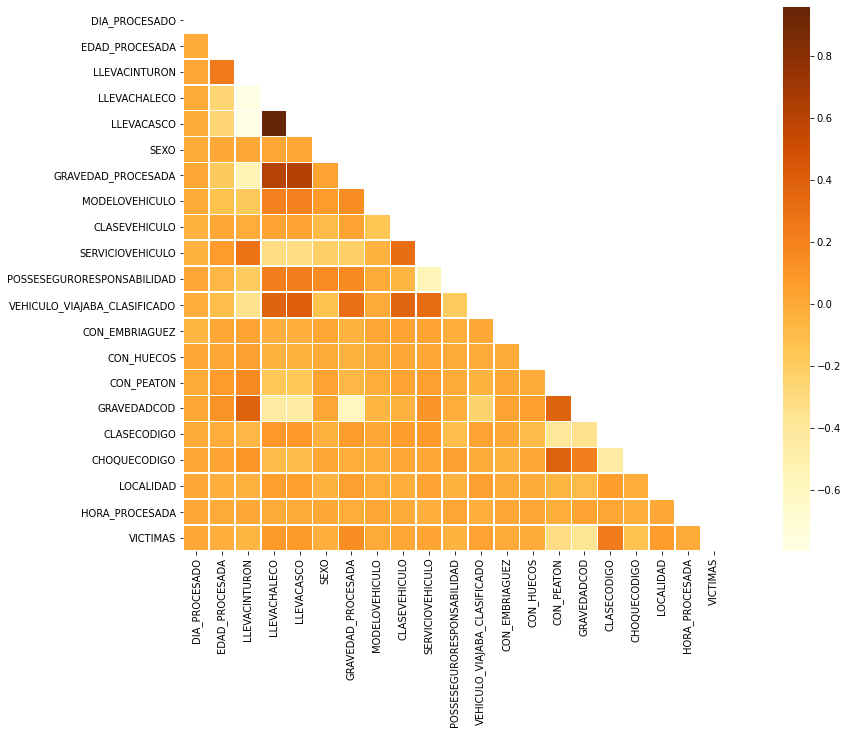

In [174]:
#Obtenemos la matriz de correlacion del dataframe
correlacion = dfsiniestros.drop('DIRECCION', axis=1).corr()

# Genera una mascara triangular superior
mask = np.zeros_like(correlacion, dtype = bool)
mask[np.triu_indices_from(mask)] = True

#Configuramos la figura de mathplotlib
f, ax = plt.subplots(figsize=(20,10))

#Creamos el heatmap a partir de la correlacion onbtenida
sns.heatmap(correlacion, mask=mask,square=True, linewidths = .5, ax=ax, cmap='YlOrBr') # cmap='BuPu'
#plt.savefig('prueba')
plt.show()

### Analisis de Edad de personas involucradas en siniestros vial

##### Siniestros por edad 
     analisis de los siniestros que se registran por edad.

In [175]:
sinrango = dfsiniestros.groupby('EDAD_PROCESADA')['EDAD_PROCESADA'].count().reset_index(name='CANTIDAD')

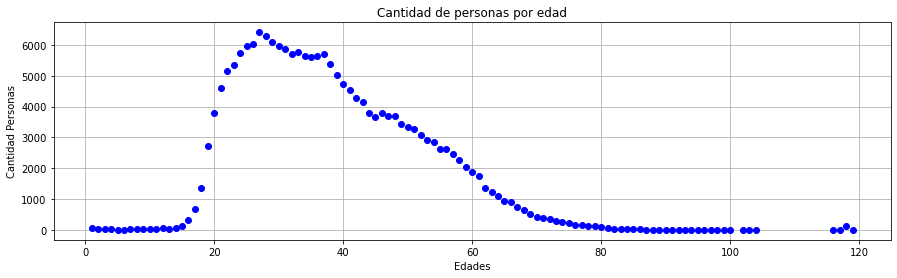

In [176]:
plt.figure(figsize=(15,4))
plt.plot(sinrango['EDAD_PROCESADA'],sinrango['CANTIDAD'], 'bo')
plt.xlabel('Edades')
plt.ylabel('Cantidad Personas')
plt.title('Cantidad de personas por edad')
plt.grid()
plt.show()
plt.close()

##### Eliminacion de edades no validas
    Devido al primer resultado del analisis usando la grafica se presentaron rangos de edad que no pertenercen al grupo
    edades permitidas para optener la licencia de conducion se modifico el rango de edad permitido bajo los criterios que de
    edad para conducir.
    
    - como valor minimo 15 debido a que es la edad minima para obtener la licencia de conduccion.
    - como valor maximo 70 debido que despues de esta edad se solicita renova la licencia de conduccion anualmente. 

In [177]:
dfsiniestros = dfsiniestros[(dfsiniestros['EDAD_PROCESADA'] >= 15) & (dfsiniestros['EDAD_PROCESADA'] <= 70)]

In [178]:
gpedad1 = dfsiniestros.groupby('EDAD_PROCESADA')['EDAD_PROCESADA'].count().reset_index(name='CANTIDAD')

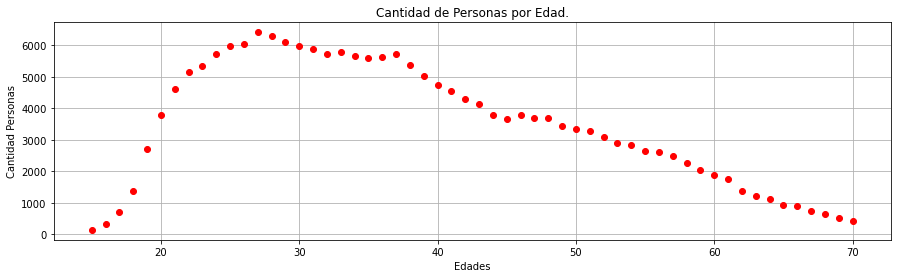

In [179]:
plt.figure(figsize=(15,4))
plt.plot(gpedad1['EDAD_PROCESADA'],gpedad1['CANTIDAD'], 'ro')
"""lstcount = gpedad1['CANTIDAD'].to_numpy()
lstcount1 = gpedad1['EDAD_PROCESADA'].to_numpy()
for i in lstcount1:
    plt.annotate(lstcount[i], (i+0.10, lstcount[i]), color='r')"""
plt.xlabel('Edades')
plt.ylabel('Cantidad Personas')
plt.title('Cantidad de Personas por Edad.')
plt.grid()
plt.show()
plt.close()

### Accidente por mes del año

In [180]:
#Analisi de personas involucradas en un isniestro por mes en cada año
gpmes17 = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2017]['FECHA'].dt.month])['EDAD_PROCESADA'].count().reset_index(name='CANTIDAD')
gpmes18 = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2018]['FECHA'].dt.month])['EDAD_PROCESADA'].count().reset_index(name='CANTIDAD')
gpmes19 = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2019]['FECHA'].dt.month])['EDAD_PROCESADA'].count().reset_index(name='CANTIDAD')


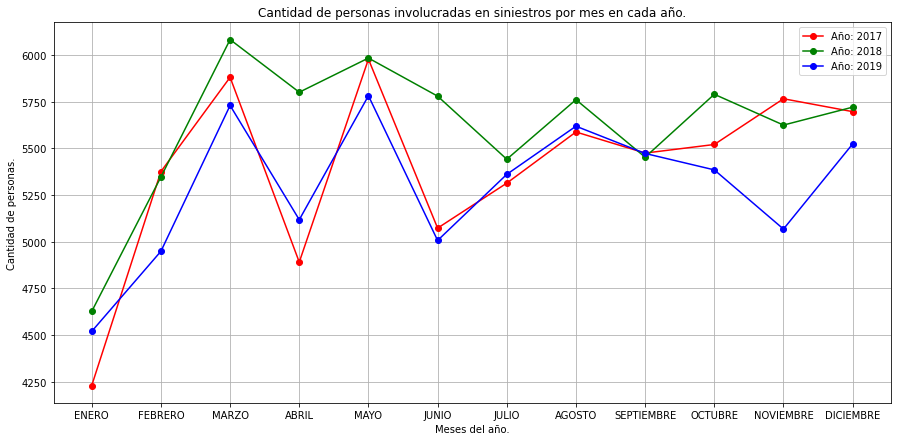

In [181]:
plt.figure(figsize=(15,7))
mes = np.array(['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE'])
plt.plot(mes, gpmes17['CANTIDAD'], 'ro-')
plt.plot(mes, gpmes18['CANTIDAD'], 'go-')
plt.plot(mes, gpmes19['CANTIDAD'], 'bo-')
plt.legend(['Año: 2017','Año: 2018','Año: 2019'])
plt.xlabel('Meses del año.')
plt.ylabel('Cantidad de personas.')
plt.title('Cantidad de personas involucradas en siniestros por mes en cada año.')
plt.grid()
plt.show()
plt.close()

#### Grafico 2:

In [182]:
#Cantidad de siniestros por dia de semana en cada año.
#gpedad = dfsiniestros.groupby('DIA_PROCESADO')['DIA_PROCESADO'].count().reset_index(name='CANTIDAD')
gp17dia = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2017]['FECHA'].dt.year, 'DIA_PROCESADO'])['DIA_PROCESADO'].count().reset_index(name='CANTIDAD')
gp18dia = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2018]['FECHA'].dt.year, 'DIA_PROCESADO'])['DIA_PROCESADO'].count().reset_index(name='CANTIDAD')
gp19dia = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2019]['FECHA'].dt.year, 'DIA_PROCESADO'])['DIA_PROCESADO'].count().reset_index(name='CANTIDAD')

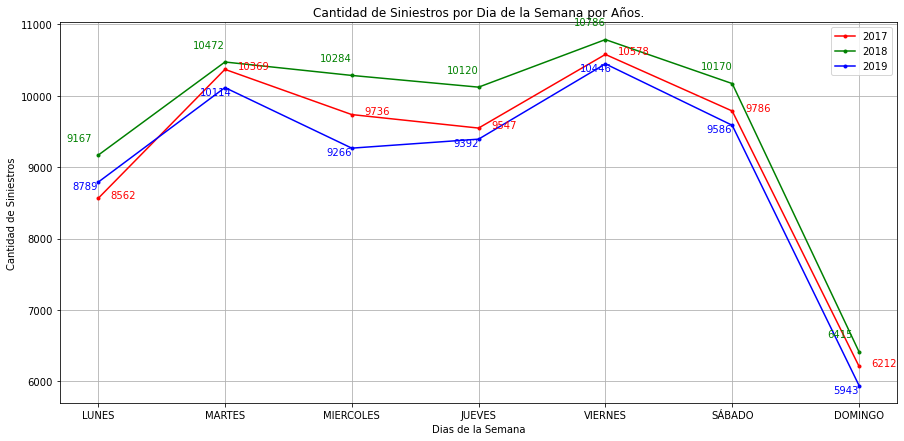

In [183]:
plt.figure(figsize=(15,7))
dias = np.array(['LUNES','MARTES','MIERCOLES','JUEVES','VIERNES','SÁBADO','DOMINGO'])
plt.plot(dias, gp17dia['CANTIDAD'], 'r.-')
plt.plot(dias, gp18dia['CANTIDAD'], 'g.-')
plt.plot(dias, gp19dia['CANTIDAD'], 'b.-')
lstcant17 = gp17dia['CANTIDAD'].to_numpy()
lstcant18 = gp18dia['CANTIDAD'].to_numpy()
lstcant19 = gp19dia['CANTIDAD'].to_numpy()
for i in range(len(dias)):
    plt.annotate(lstcant17[i], (i+0.10, lstcant17[i]), color='r')
    plt.annotate(lstcant18[i], (i-0.25, 200+lstcant18[i]), color='g')
    plt.annotate(lstcant19[i], (i-0.20, lstcant19[i]-100), color='b')
plt.xlabel('Dias de la Semana')
plt.ylabel('Cantidad de Siniestros')
plt.title('Cantidad de Siniestros por Dia de la Semana por Años.')
plt.legend([2017,2018,2019])
plt.grid()
plt.show()
plt.close()

In [184]:
g17ploc = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2017]['FECHA'].dt.year,'LOCALIDAD'])['LOCALIDAD'].count().reset_index(name='CANTIDAD')
g18ploc = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2018]['FECHA'].dt.year,'LOCALIDAD'])['LOCALIDAD'].count().reset_index(name='CANTIDAD')
g19ploc = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2019]['FECHA'].dt.year,'LOCALIDAD'])['LOCALIDAD'].count().reset_index(name='CANTIDAD')
localidades = np.array(['KENNEDY','USAQUEN','ENGATIVA','SUBA','FONTIBON','PUENTE ARANDA','CHAPINERO','BARRIOS UNIDOS','TEUSAQUILLO','BOSA','CIUDAD BOLIVAR','LOS MARTIRES','SANTA FE','TUNJUELITO','SAN CRISTOBAL','RAFAEL URIBE URIBE','ANTONIO NARIÑO','USME','CANDELARIA','SUMAPAZ'])

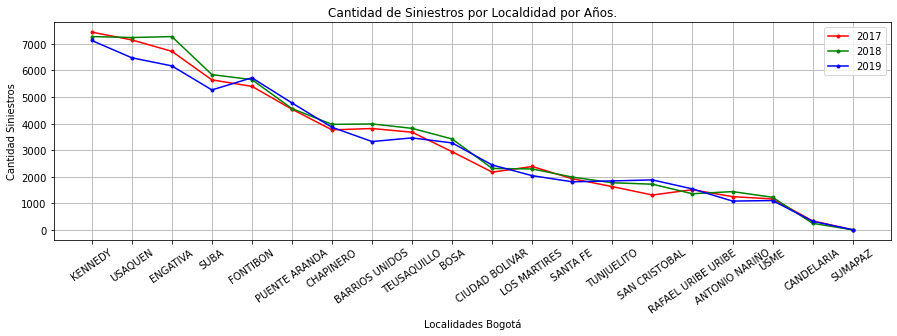

In [185]:
plt.figure(figsize=(15,4))
plt.plot(localidades,g17ploc['CANTIDAD'], 'r.-')
plt.plot(localidades,g18ploc['CANTIDAD'], 'g.-')
plt.plot(localidades,g19ploc['CANTIDAD'], 'b.-')
plt.xticks(rotation=35)
plt.legend([2017,2018,2019])
plt.xlabel('Localidades Bogotá')
plt.ylabel('Cantidad Siniestros')
plt.title('Cantidad de Siniestros por Localdidad por Años.')
plt.grid()
plt.show()
plt.close()

### Analisis de clase de vehiculo

#### Cantidad de clase de vehiculos involucrados en un siniestro por mes 

In [186]:
gpmescar17 = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2017]['FECHA'].dt.month,'CLASEVEHICULO' ])['CLASEVEHICULO'].count().reset_index(name='CANTIDAD')
gpmescar18 = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2018]['FECHA'].dt.month,'CLASEVEHICULO' ])['CLASEVEHICULO'].count().reset_index(name='CANTIDAD')
gpmescar19 = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2019]['FECHA'].dt.month,'CLASEVEHICULO' ])['CLASEVEHICULO'].count().reset_index(name='CANTIDAD')

In [187]:
#año 2017

#Automovil
automovil17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 1]
#Motocicleta
motocicleta17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 2]
#Caomioneta
camioneta17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 3]
#Bus
bus17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 4]
#Furgon
furgon17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 5]
#Campero
campero17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 6]
#Microbus
mircrobus17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 7]
#Buseta
buseta17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 8]
#Tractocamion
tractocamion17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 9]
#Volqueta
volqueta17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 10]
#Bicicleta
bicicleta17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 11]
#Bicitaxi
bicitaxi17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 12]
#Motociclo
motociclo17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 13]
#Tractocamion
#tractocamion17 = gpmescar17[gpmescar17['CLASEVEHICULO']== 14]
#Cuatrimoto
cuatrimoto17 =  gpmescar17[gpmescar17['CLASEVEHICULO']== 15]

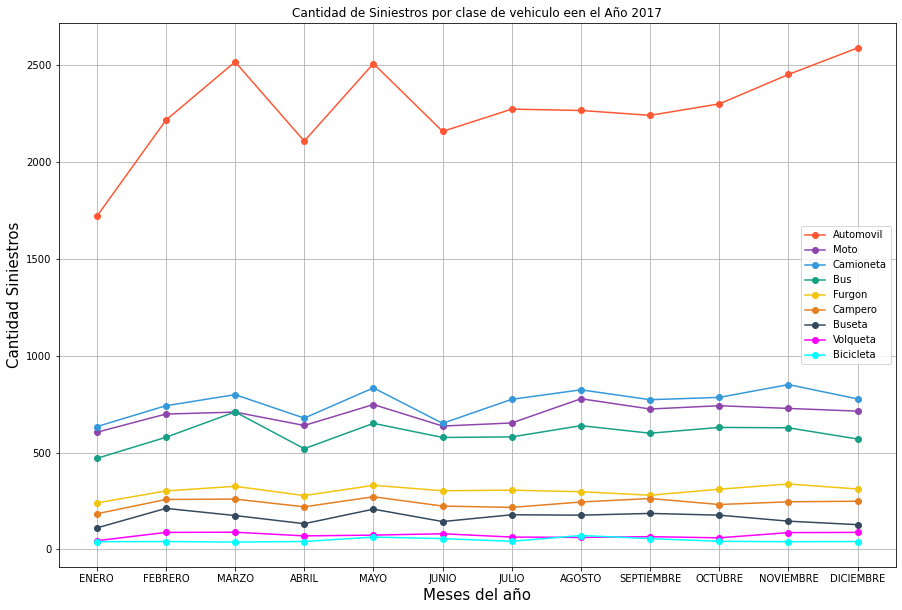

In [188]:
plt.figure(figsize=(15,10))
mes = np.array(['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE'])
plt.plot(mes, automovil17['CANTIDAD'],color='#FF5733', marker = 'o', markerfacecolor = '#FF5733')
plt.plot(mes, motocicleta17['CANTIDAD'], color='#8E44AD', marker = 'o', markerfacecolor = '#8E44AD')
plt.plot(mes, camioneta17['CANTIDAD'], color='#3498DB', marker = 'o', markerfacecolor = '#3498DB')
plt.plot(mes, bus17['CANTIDAD'], color='#16A085', marker = 'o', markerfacecolor = '#16A085')
plt.plot(mes, furgon17['CANTIDAD'], color='#F1C40F', marker = 'o', markerfacecolor = '#F1C40F')
plt.plot(mes, campero17['CANTIDAD'], color='#E67E22', marker = 'o', markerfacecolor = '#E67E22')
plt.plot(mes, buseta17['CANTIDAD'], color='#34495E', marker = 'o', markerfacecolor = '#34495E')
plt.plot(mes, volqueta17['CANTIDAD'], color='#FF00FF', marker = 'o', markerfacecolor = '#FF00FF')
plt.plot(mes, bicicleta17['CANTIDAD'], color='#00FFFF', marker = 'o', markerfacecolor = '#00FFFF')
plt.legend(['Automovil','Moto','Camioneta','Bus','Furgon','Campero','Buseta','Volqueta','Bicicleta'], fontsize = 10)
plt.xlabel('Meses del año', fontsize = 15)
plt.ylabel('Cantidad Siniestros', fontsize = 15)
plt.title('Cantidad de Siniestros por clase de vehiculo een el Año 2017')
plt.grid()
plt.show()
plt.close()

In [189]:
#año 2018

#Automovil
automovil18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 1]
#Motocicleta
motocicleta18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 2]
#Caomioneta
camioneta18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 3]
#Bus
bus18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 4]
#Furgon
furgon18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 5]
#Campero
campero18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 6]
#Microbus
mircrobus18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 7]
#Buseta
buseta18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 8]
#Tractocamion
#tractocamion18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 9]
#Volqueta
volqueta18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 10]
#Bicicleta
bicicleta18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 11]
#Bicitaxi
#bicitaxi18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 12]
#Motociclo
#motociclo18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 13
#Tractocamion
tractocamion18 = gpmescar18[gpmescar18['CLASEVEHICULO']== 14]
#Cuatrimoto
cuatrimoto18 =  gpmescar18[gpmescar18['CLASEVEHICULO']== 15]

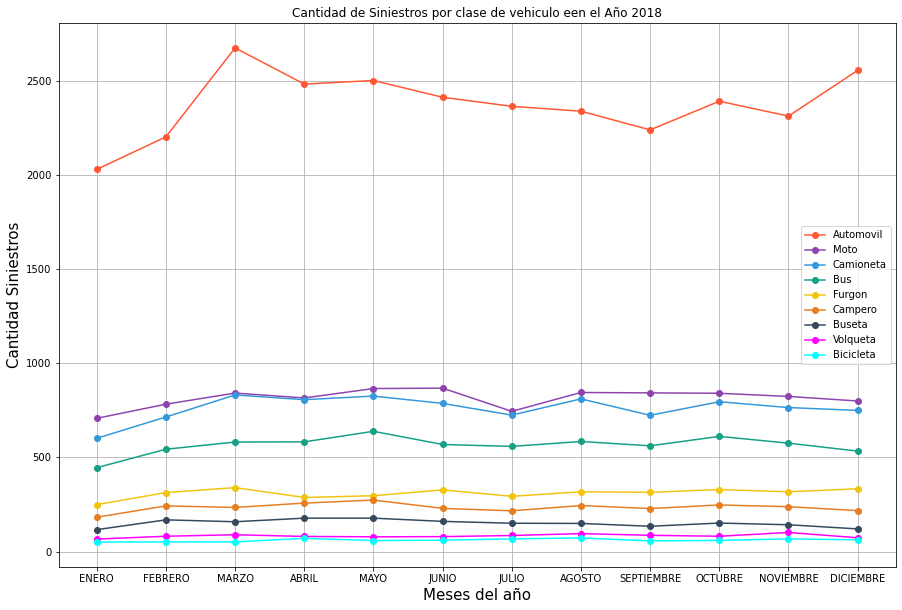

In [190]:
plt.figure(figsize=(15,10))
mes = np.array(['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE'])
plt.plot(mes, automovil18['CANTIDAD'],color='#FF5733', marker = 'o', markerfacecolor = '#FF5733')
plt.plot(mes, motocicleta18['CANTIDAD'], color='#8E44AD', marker = 'o', markerfacecolor = '#8E44AD')
plt.plot(mes, camioneta18['CANTIDAD'], color='#3498DB', marker = 'o', markerfacecolor = '#3498DB')
plt.plot(mes, bus18['CANTIDAD'], color='#16A085', marker = 'o', markerfacecolor = '#16A085')
plt.plot(mes, furgon18['CANTIDAD'], color='#F1C40F', marker = 'o', markerfacecolor = '#F1C40F')
plt.plot(mes, campero18['CANTIDAD'], color='#E67E22', marker = 'o', markerfacecolor = '#E67E22')
plt.plot(mes, buseta18['CANTIDAD'], color='#34495E', marker = 'o', markerfacecolor = '#34495E')
plt.plot(mes, volqueta18['CANTIDAD'], color='#FF00FF', marker = 'o', markerfacecolor = '#FF00FF')
plt.plot(mes, bicicleta18['CANTIDAD'], color='#00FFFF', marker = 'o', markerfacecolor = '#00FFFF')
plt.legend(['Automovil','Moto','Camioneta','Bus','Furgon','Campero','Buseta','Volqueta','Bicicleta'], fontsize = 10)
plt.xlabel('Meses del año', fontsize = 15)
plt.ylabel('Cantidad Siniestros', fontsize = 15)
plt.title('Cantidad de Siniestros por clase de vehiculo een el Año 2018')
plt.grid()
plt.show()
plt.close()

In [191]:
#año 2019

#Automovil
automovil19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 1]
#Motocicleta
motocicleta19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 2]
#Caomioneta
camioneta19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 3]
#Bus
bus19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 4]
#Furgon
furgon19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 5]
#Campero
campero19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 6]
#Microbus
mircrobus19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 7]
#Buseta
buseta19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 8]
#Tractocamio
#tractocamion19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 9]
#Volqueta
volqueta19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 10]
#Bicicleta
bicicleta19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 11]
#Bicitaxi
#bicitaxi19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 12]
#Motociclo
#motociclo19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 13
#Tractocamion
tractocamion19 = gpmescar19[gpmescar19['CLASEVEHICULO']== 14]
#Cuatrimoto
cuatrimoto19 =  gpmescar19[gpmescar19['CLASEVEHICULO']== 15]

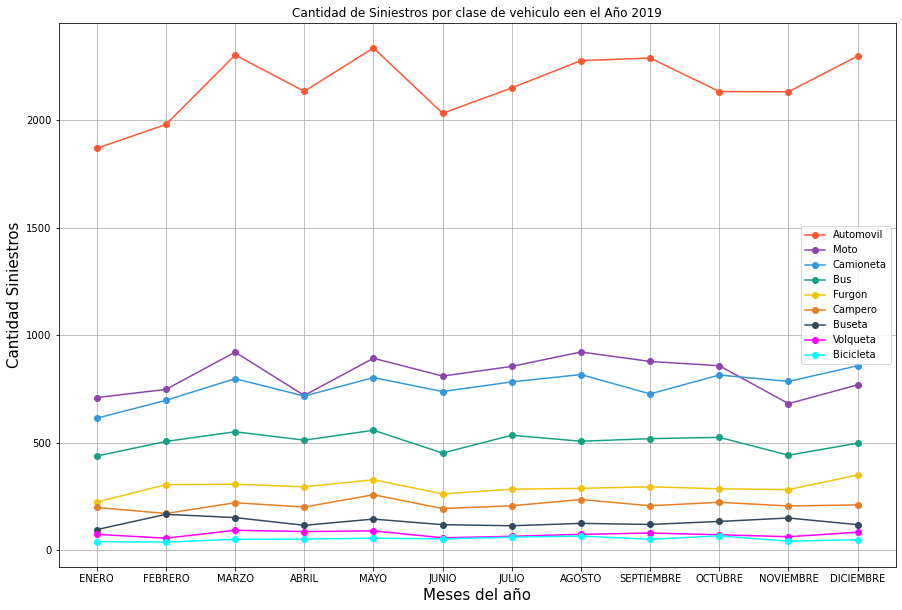

In [192]:
plt.figure(figsize=(15,10))
mes = np.array(['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE'])
plt.plot(mes, automovil19['CANTIDAD'],color='#FF5733', marker = 'o', markerfacecolor = '#FF5733')
plt.plot(mes, motocicleta19['CANTIDAD'], color='#8E44AD', marker = 'o', markerfacecolor = '#8E44AD')
plt.plot(mes, camioneta19['CANTIDAD'], color='#3498DB', marker = 'o', markerfacecolor = '#3498DB')
plt.plot(mes, bus19['CANTIDAD'], color='#16A085', marker = 'o', markerfacecolor = '#16A085')
plt.plot(mes, furgon19['CANTIDAD'], color='#F1C40F', marker = 'o', markerfacecolor = '#F1C40F')
plt.plot(mes, campero19['CANTIDAD'], color='#E67E22', marker = 'o', markerfacecolor = '#E67E22')
plt.plot(mes, buseta19['CANTIDAD'], color='#34495E', marker = 'o', markerfacecolor = '#34495E')
plt.plot(mes, volqueta19['CANTIDAD'], color='#FF00FF', marker = 'o', markerfacecolor = '#FF00FF')
plt.plot(mes, bicicleta19['CANTIDAD'], color='#00FFFF', marker = 'o', markerfacecolor = '#00FFFF')
plt.legend(['Automovil','Moto','Camioneta','Bus','Furgon','Campero','Buseta','Volqueta','Bicicleta'], fontsize = 10)
plt.xlabel('Meses del año', fontsize = 15)
plt.ylabel('Cantidad Siniestros', fontsize = 15)
plt.title('Cantidad de Siniestros por clase de vehiculo een el Año 2019')
plt.grid()
plt.show()
plt.close()

### Analisis uso de elementos de seguridad
#### Uso de chaleco

In [193]:
# Cantidad de Personas por uso de casco
gpedadlca = dfsiniestros.groupby(['LLEVACASCO','EDAD_PROCESADA'])['EDAD_PROCESADA'].count().reset_index(name='CANTIDAD')
gpelca0 = gpedadlca[gpedadlca['LLEVACASCO']== 0]
gpelca1 = gpedadlca[gpedadlca['LLEVACASCO']== 1]
gpelca2 = gpedadlca[gpedadlca['LLEVACASCO']== 2]

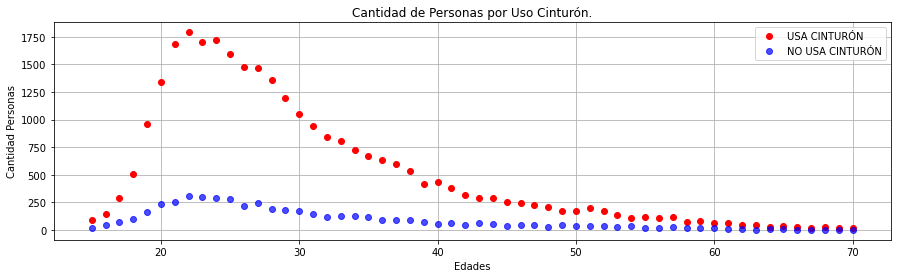

In [194]:
plt.figure(figsize=(15,4))
plt.plot(gpelca1['EDAD_PROCESADA'],gpelca1['CANTIDAD'], 'ro')
plt.plot(gpelca2['EDAD_PROCESADA'],gpelca2['CANTIDAD'], 'bo', alpha=0.7)
#plt.plot(gpedadcha0['EDAD_PROCESADA'],gpedadcha0['CANTIDAD'], 'go', alpha=0.7)
#plt.xticks(rotation=35)
plt.legend(['USA CINTURÓN','NO USA CINTURÓN'])
plt.xlabel('Edades')
plt.ylabel('Cantidad Personas')
plt.title('Cantidad de Personas por Uso Cinturón.')
plt.grid()
plt.show()
plt.close()

#### Uso de chaleco

In [195]:
# Cantidad de Personas por uso de chaleco
gpedad = dfsiniestros.groupby(['LLEVACHALECO','EDAD_PROCESADA'])['EDAD_PROCESADA'].count().reset_index(name='CANTIDAD')
gpedadcha0 = gpedad[gpedad['LLEVACHALECO']== 0]
gpedadcha1 = gpedad[gpedad['LLEVACHALECO']== 1]
gpedadcha2 = gpedad[gpedad['LLEVACHALECO']== 2]

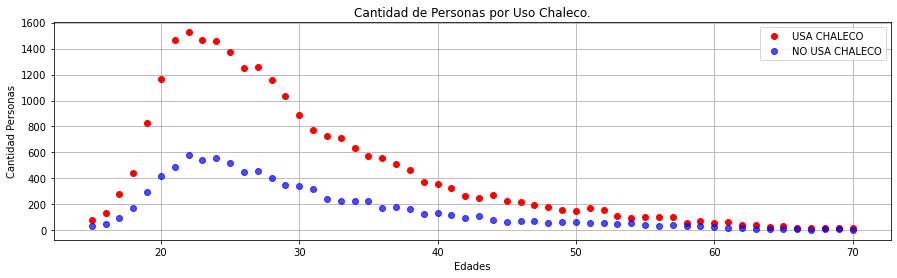

In [196]:
plt.figure(figsize=(15,4))
plt.plot(gpedadcha1['EDAD_PROCESADA'],gpedadcha1['CANTIDAD'], 'ro')
plt.plot(gpedadcha2['EDAD_PROCESADA'],gpedadcha2['CANTIDAD'], 'bo', alpha=0.7)
#plt.plot(gpedadcha0['EDAD_PROCESADA'],gpedadcha0['CANTIDAD'], 'go', alpha=0.7)
#plt.xticks(rotation=35)
plt.legend(['USA CHALECO','NO USA CHALECO'])
plt.xlabel('Edades')
plt.ylabel('Cantidad Personas')
plt.title('Cantidad de Personas por Uso Chaleco.')
plt.grid()
plt.show()
plt.close()

#### Uso cinturón

In [197]:
gpedad = dfsiniestros.groupby(['LLEVACINTURON','EDAD_PROCESADA'])['EDAD_PROCESADA'].count().reset_index(name='CANTIDAD')
gpelc0 = gpedad[gpedad['LLEVACINTURON']== 0]
gpelc1 = gpedad[gpedad['LLEVACINTURON']== 1]
gpelc2 = gpedad[gpedad['LLEVACINTURON']== 2]

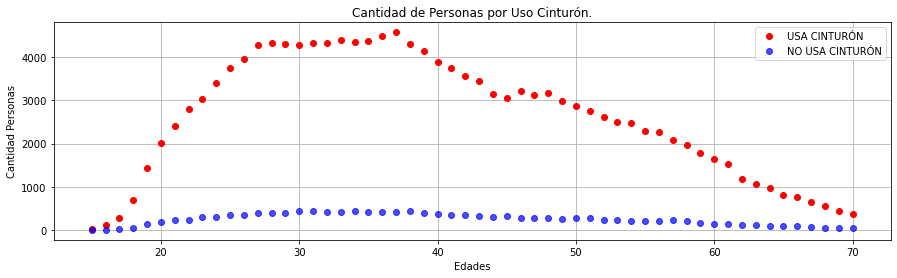

In [198]:
plt.figure(figsize=(15,4))
plt.plot(gpelc1['EDAD_PROCESADA'],gpelc1['CANTIDAD'], 'ro')
plt.plot(gpelc2['EDAD_PROCESADA'],gpelc2['CANTIDAD'], 'bo', alpha=0.7)
#plt.plot(gpedadcha0['EDAD_PROCESADA'],gpedadcha0['CANTIDAD'], 'go', alpha=0.7)
#plt.xticks(rotation=35)
plt.legend(['USA CINTURÓN','NO USA CINTURÓN'])
plt.xlabel('Edades')
plt.ylabel('Cantidad Personas')
plt.title('Cantidad de Personas por Uso Cinturón.')
plt.grid()
plt.show()
plt.close()

### Analisis de gravedad del siniestro por gravedad de personas involucradas.
#### GRAVEDADCOD
1. CON MUERTOS
2. CON HERIDOS
3. SOLO DAÑOS

#### GRAVEDAD_PROCESADA
1. ILESA
2. HERIDO VALORADO
3. HERIDO HOSPITALIZADO
4. MUERTA

In [199]:
# Cantidad de siniestros por gravedades
gpgrav = dfsiniestros.groupby(['GRAVEDAD_PROCESADA','GRAVEDADCOD'])['EDAD_PROCESADA'].count().reset_index(name='CANTIDAD')
gpgrav

,GRAVEDAD_PROCESADA,GRAVEDADCOD,CANTIDAD
0,1,1,1116
1,1,2,30663
2,1,3,138671
3,2,1,292
4,2,2,22991
5,2,3,5
6,3,1,38
7,3,2,1328
8,4,1,636


- 1  1 = Muertos  ```4```
- 1  2 = Heridos Valorado ```2```
- 1  3 = Ilesos  ```1```
- 2  1 = Heridos Hospitalizado ```3```
- 2  2 = Heridos Valorado  ```2```
- 2  3 = Ilesos  ```1```
- 3  1 = Heridos Hospitalizado  ```3```
- 3  2 = Heridos Hospitalizado  ```3```
- 4  1 = Muertos  ```4```

In [200]:
# Creación de campo gravedad con datos genericos
dfsiniestros['GRAVEDAD'] = dfsiniestros['GRAVEDADCOD']

In [201]:
# Muertos 1 1
dfsiniestros.loc[( (dfsiniestros['GRAVEDAD_PROCESADA'] == 1) & (dfsiniestros['GRAVEDADCOD'] == 1) ),'GRAVEDAD'] = 4 
# Muertos 1 2
dfsiniestros.loc[( (dfsiniestros['GRAVEDAD_PROCESADA'] == 1) & (dfsiniestros['GRAVEDADCOD'] == 2) ),'GRAVEDAD'] = 2
# Muertos 1 3
dfsiniestros.loc[( (dfsiniestros['GRAVEDAD_PROCESADA'] == 1) & (dfsiniestros['GRAVEDADCOD'] == 3) ),'GRAVEDAD'] = 1 
# Muertos 2 1
dfsiniestros.loc[( (dfsiniestros['GRAVEDAD_PROCESADA'] == 2) & (dfsiniestros['GRAVEDADCOD'] == 1) ),'GRAVEDAD'] = 3 
# Muertos 2 2
dfsiniestros.loc[( (dfsiniestros['GRAVEDAD_PROCESADA'] == 2) & (dfsiniestros['GRAVEDADCOD'] == 2) ),'GRAVEDAD'] = 2 
# Muertos 2 3
dfsiniestros.loc[( (dfsiniestros['GRAVEDAD_PROCESADA'] == 2) & (dfsiniestros['GRAVEDADCOD'] == 3) ),'GRAVEDAD'] = 1 
# Muertos 3 1
dfsiniestros.loc[( (dfsiniestros['GRAVEDAD_PROCESADA'] == 3) & (dfsiniestros['GRAVEDADCOD'] == 1) ),'GRAVEDAD'] = 3 
# Muertos 3 2
dfsiniestros.loc[( (dfsiniestros['GRAVEDAD_PROCESADA'] == 3) & (dfsiniestros['GRAVEDADCOD'] == 2) ),'GRAVEDAD'] = 3 
# Muertos 4 1
dfsiniestros.loc[( (dfsiniestros['GRAVEDAD_PROCESADA'] == 4) & (dfsiniestros['GRAVEDADCOD'] == 1) ),'GRAVEDAD'] = 4 

In [202]:
# Cantidad de siniestros agrupados por tipo de gravedad de accidentes.
gpgrav = dfsiniestros.groupby(['GRAVEDAD'])['GRAVEDAD'].count().reset_index(name='CANTIDAD')

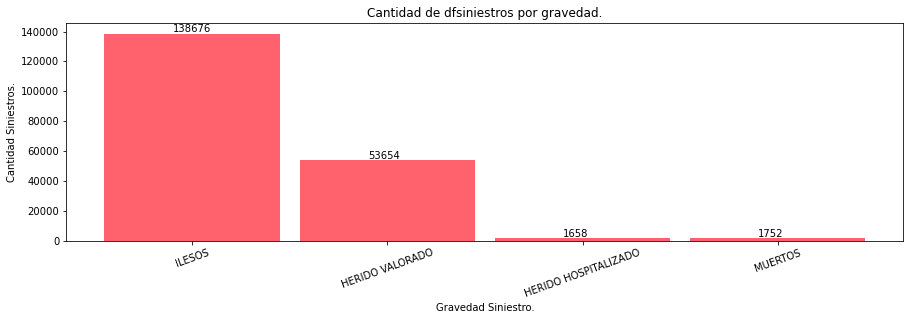

In [203]:
# Mostramos la cantidad de siniestros por gravedad.
plt.figure(figsize=(15,4))
lstgrave = np.array(['ILESOS','HERIDO VALORADO','HERIDO HOSPITALIZADO','MUERTOS'])
plt.bar(lstgrave, gpgrav['CANTIDAD'], width=0.9, color='#FF616D')
plt.title("Cantidad de dfsiniestros por gravedad.")
plt.ylabel("Cantidad Siniestros.")
plt.xlabel("Gravedad Siniestro.")
plt.xticks(rotation=20)
lstcant = gpgrav['CANTIDAD'].to_numpy()

for i in range(len(lstcant)):
    plt.annotate(lstcant[i], (i-0.10, 1000+lstcant[i]))

plt.show()
plt.close()

In [204]:
# Cantidad de siniestros agrupados por tipo de gravedad de accidentes.
gpgran = dfsiniestros.groupby([dfsiniestros['FECHA'].dt.year,'GRAVEDAD'])['GRAVEDAD'].count().reset_index(name='CANTIDAD')
#gpgran

In [205]:
gpgran

,FECHA,GRAVEDAD,CANTIDAD
0,2017,1,47976
1,2017,2,15623
2,2017,3,565
3,2017,4,626
4,2018,1,46997
5,2018,2,19397
6,2018,3,456
7,2018,4,564
8,2019,1,43703
9,2019,2,18634


In [206]:
gpgra17 = gpgran[gpgran['FECHA'] == 2017]
gpgra18 = gpgran[gpgran['FECHA'] == 2018]
gpgra19 = gpgran[gpgran['FECHA'] == 2019]
gpgra19

,FECHA,GRAVEDAD,CANTIDAD
8,2019,1,43703
9,2019,2,18634
10,2019,3,637
11,2019,4,562


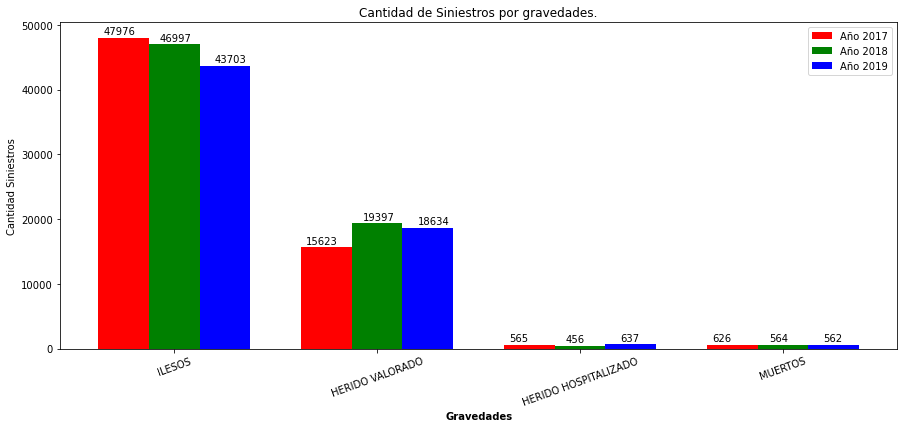

In [207]:
plt.figure(figsize=(15,6))
lstgravedad = np.array(['ILESOS','HERIDO VALORADO','HERIDO HOSPITA.','MUERTOS'])
barWidth = 0.25
r1 = np.arange(len(lstgravedad))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1,gpgra17['CANTIDAD'], width=barWidth, color='red')
plt.bar(r2,gpgra18['CANTIDAD'], width=barWidth,color='green')
plt.bar(r3,gpgra19['CANTIDAD'], width=barWidth, color='blue')
plt.legend(['Año 2017','Año 2018', 'Año 2019'])
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(lstgravedad))], ['ILESOS','HERIDO VALORADO','HERIDO HOSPITALIZADO','MUERTOS'], rotation=20)
lstcant = gpgra17['CANTIDAD'].to_numpy()
for i in range(len(lstcant)):
    plt.annotate(lstcant[i], (i-0.10, 500+lstcant[i]))
    
lstcant18 = gpgra18['CANTIDAD'].to_numpy()    
for i in range(len(lstcant18)):
    plt.annotate(lstcant18[i], (i+0.18, 500+lstcant18[i]))
    
lstcant19 = gpgra19['CANTIDAD'].to_numpy()
for i in range(len(lstcant19)):
    plt.annotate(lstcant19[i], (i+0.45, 500+lstcant19[i]))
plt.xlabel('Gravedades')    
plt.ylabel('Cantidad Siniestros')
plt.title('Cantidad de Siniestros por gravedades.')
plt.show()
plt.close()

In [208]:
gracogpcoun = dfsiniestros.groupby(['GRAVEDAD_PROCESADA']).size().reset_index(name='CANTIDAD')
gracogpcoun = gracogpcoun.sort_values(by=['CANTIDAD'], ascending=True)
#gracogpcoun

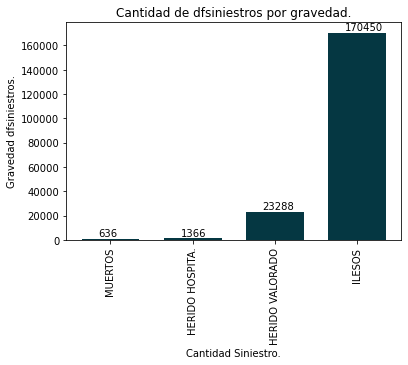

In [209]:
plt.figure()
lstgrave = np.array(['MUERTOS','HERIDO HOSPITA.','HERIDO VALORADO','ILESOS'])
plt.bar(lstgrave, gracogpcoun['CANTIDAD'], width=0.7, color='#053742')
plt.title("Cantidad de dfsiniestros por gravedad.")
plt.ylabel("Gravedad dfsiniestros.")
plt.xlabel("Cantidad Siniestro.")
plt.xticks(rotation=90)
lstcant = gracogpcoun['CANTIDAD'].to_numpy()

for i in range(len(lstcant)):
    plt.annotate(lstcant[i], (i-0.15, 2000+lstcant[i]))

plt.show()
plt.close()

### Eliminacion de campos ```GRAVEDADCOD``` - ```GRAVEDAD_PROCESADA```

In [210]:
del dfsiniestros['GRAVEDADCOD']
del dfsiniestros['GRAVEDAD_PROCESADA']

### Eliminacion de campos TEMPORAL
- Esto se debe pasar al archivo de preparación de los datos.

In [211]:
del dfsiniestros['SERVICIOVEHICULO']
del dfsiniestros['VEHICULO_VIAJABA_CLASIFICADO']
del dfsiniestros['CON_PEATON']
del dfsiniestros['CHOQUECODIGO']
del dfsiniestros['CLASECODIGO']
del dfsiniestros['VICTIMAS']

### Analisis de gravedad de accidente con hueco

In [212]:
gpgch = dfsiniestros.groupby(['CON_HUECOS','GRAVEDAD'])['CON_HUECOS'].count().reset_index(name='CANTIDAD')

In [213]:
gpgch1 = gpgch[gpgch['GRAVEDAD'] == 1]
gpgch2 = gpgch[gpgch['GRAVEDAD'] == 2]
gpgch3 = gpgch[gpgch['GRAVEDAD'] == 3]
gpgch4 = gpgch[gpgch['GRAVEDAD'] == 4]

### Analisis de portabalidad seguro 

In [214]:
gpse = dfsiniestros.groupby(['SEXO', 'POSSESEGURORESPONSABILIDAD'])['POSSESEGURORESPONSABILIDAD'].count().reset_index(name='CANTIDAD')

In [215]:
gpseMa = gpse[gpse['SEXO'] == 1]
gpseFe = gpse[gpse['SEXO'] == 2]

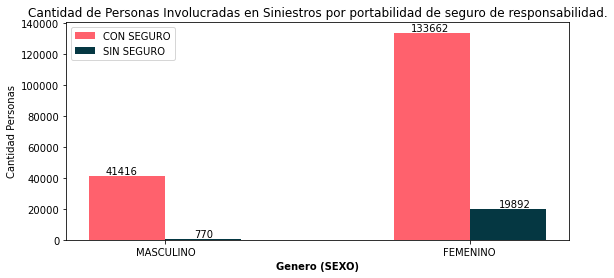

In [216]:
plt.figure(figsize=(9,4))
lstSexo = np.array(['MASCULINO','FEMENINO'])
barWidth = 0.25
r1 = np.arange(len(lstSexo))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1,gpseMa['CANTIDAD'], width=barWidth, color='#FF616D' )
plt.bar(r2,gpseFe['CANTIDAD'], width=barWidth, color='#053742' )
lstcant = gpseMa['CANTIDAD'].to_numpy()
for i in range(len(lstcant)):
    plt.annotate(lstcant[i], (i-0.07, 900+lstcant[i] ))
    
lstcantFe = gpseFe['CANTIDAD'].to_numpy()    
for i in range(len(lstcantFe)):
    plt.annotate(lstcantFe[i], (i+0.22, 900+lstcantFe[i]))
plt.legend(['CON SEGURO','SIN SEGURO'])
plt.xlabel('Genero (SEXO)', fontweight='bold')
plt.xticks([r + barWidth-0.125 for r in range(len(lstSexo))], lstSexo)
plt.ylabel('Cantidad Personas')
plt.title('Cantidad de Personas Involucradas en Siniestros por portabilidad de seguro de responsabilidad.')
plt.show()
plt.close()

### Analisis de modelo de vehiculo

In [217]:
gpve17 = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2017]['FECHA'].dt.year,'MODELOVEHICULO'])['MODELOVEHICULO'].count().reset_index(name='CANTIDAD')
gpve18 = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2018]['FECHA'].dt.year,'MODELOVEHICULO'])['MODELOVEHICULO'].count().reset_index(name='CANTIDAD')
gpve19 = dfsiniestros.groupby([dfsiniestros[dfsiniestros['FECHA'].dt.year == 2019]['FECHA'].dt.year,'MODELOVEHICULO'])['MODELOVEHICULO'].count().reset_index(name='CANTIDAD')

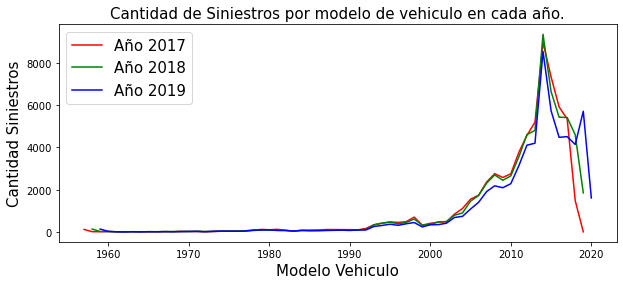

In [218]:
plt.figure(figsize=(10,4))
plt.plot(gpve17['MODELOVEHICULO'], gpve17['CANTIDAD'], 'r-')
plt.plot(gpve18['MODELOVEHICULO'], gpve18['CANTIDAD'], 'g-')
plt.plot(gpve19['MODELOVEHICULO'], gpve19['CANTIDAD'], 'b-')
plt.legend(['Año 2017','Año 2018','Año 2019'], fontsize=15)
plt.ylabel('Cantidad Siniestros', fontsize=15)
plt.xlabel('Modelo Vehiculo', fontsize=15)
plt.title('Cantidad de Siniestros por modelo de vehiculo en cada año.', fontsize=15)
plt.show()
plt.close()

### Analisis pohora procesada
#### Cantidad de Siniestros

In [219]:
gphra = dfsiniestros.groupby('HORA_PROCESADA')['HORA_PROCESADA'].count().reset_index(name='CANTIDAD')

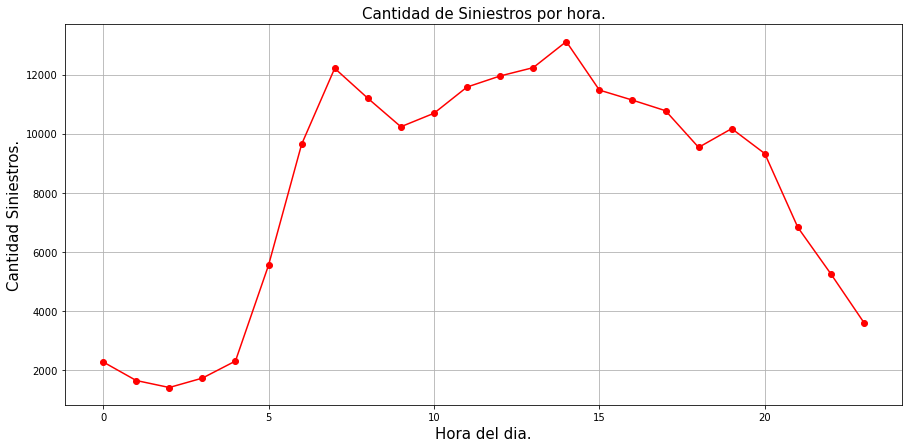

In [220]:
plt.figure(figsize=(15,7))
lsthora = gphra['HORA_PROCESADA'].to_numpy()
plt.plot(gphra['HORA_PROCESADA'],gphra['CANTIDAD'], 'ro-')
plt.ylabel('Cantidad Siniestros.', fontsize=15)
plt.xlabel('Hora del dia.', fontsize=15)
plt.title('Cantidad de Siniestros por hora.', fontsize=15)
plt.grid()
plt.show()
plt.close()

#### Por gravedad de siniestro

In [221]:
gphrg = dfsiniestros.groupby(['HORA_PROCESADA','GRAVEDAD'])['HORA_PROCESADA'].count().reset_index(name='CANTIDAD')
gphrg1 = gphrg[gphrg['GRAVEDAD'] == 1]
gphrg2 = gphrg[gphrg['GRAVEDAD'] == 2]
gphrg3 = gphrg[gphrg['GRAVEDAD'] == 3]
gphrg4 = gphrg[gphrg['GRAVEDAD'] == 4]

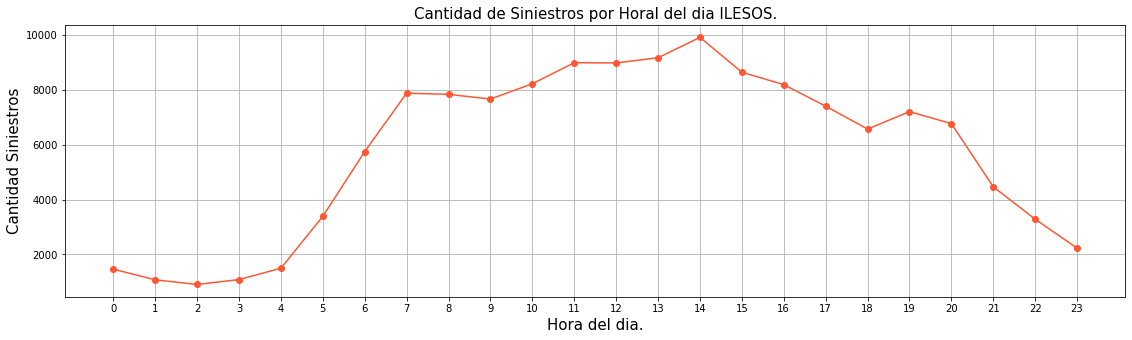

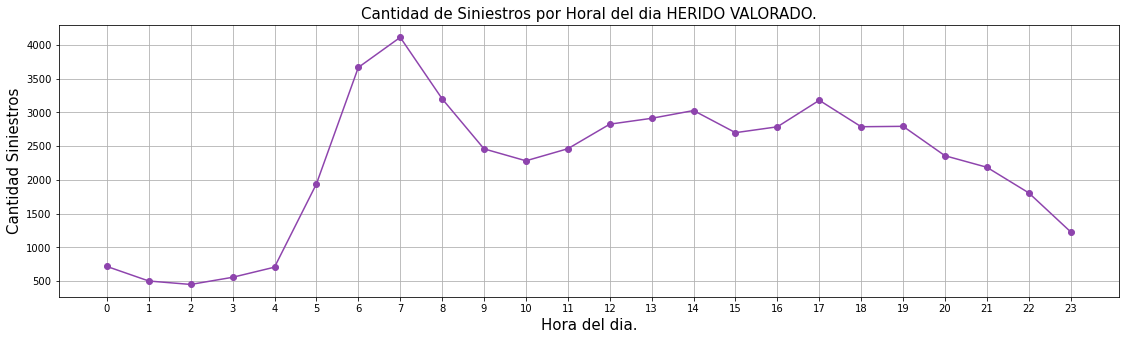

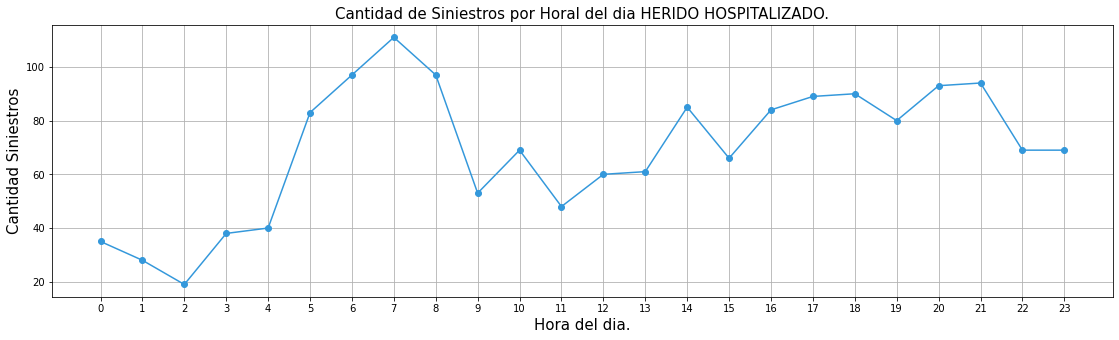

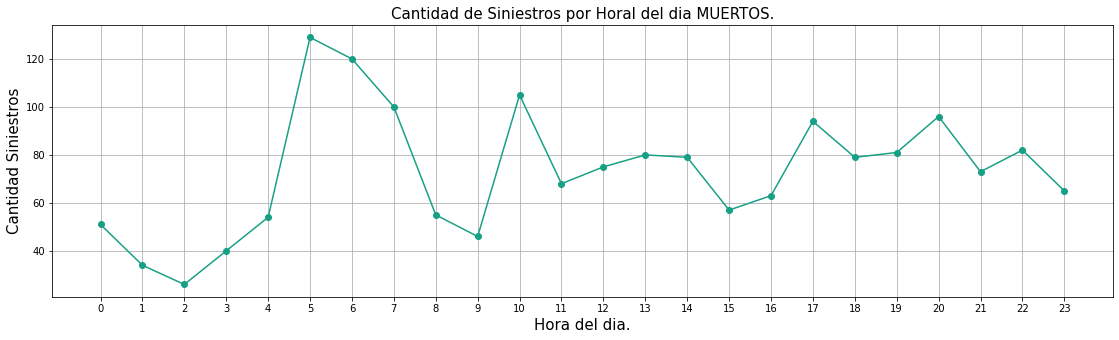

In [234]:
plt.figure(figsize=(19,5))
plt.ylabel('Cantidad Siniestros', fontsize=15)
plt.xlabel('Hora del dia.', fontsize=15)
plt.title('Cantidad de Siniestros por Horal del dia ILESOS.', fontsize=15)
plt.xticks(lsthora)
plt.plot(gphrg1['HORA_PROCESADA'], gphrg1['CANTIDAD'],color='#FF5733', marker = 'o', markerfacecolor = '#FF5733')
plt.grid()
plt.show()
plt.figure(figsize=(19,5))
plt.ylabel('Cantidad Siniestros', fontsize=15)
plt.xlabel('Hora del dia.', fontsize=15)
plt.title('Cantidad de Siniestros por Horal del dia HERIDO VALORADO.', fontsize=15)
plt.xticks(lsthora)
plt.plot(gphrg2['HORA_PROCESADA'], gphrg2['CANTIDAD'], color='#8E44AD', marker = 'o', markerfacecolor = '#8E44AD')
plt.grid()
plt.show()
plt.figure(figsize=(19,5))
plt.ylabel('Cantidad Siniestros', fontsize=15)
plt.xlabel('Hora del dia.', fontsize=15)
plt.xticks(lsthora)
plt.title('Cantidad de Siniestros por Horal del dia HERIDO HOSPITALIZADO.', fontsize=15)
plt.plot(gphrg3['HORA_PROCESADA'], gphrg3['CANTIDAD'], color='#3498DB', marker = 'o', markerfacecolor = '#3498DB')
plt.grid()
plt.show()
plt.figure(figsize=(19,5))
plt.ylabel('Cantidad Siniestros', fontsize=15)
plt.xlabel('Hora del dia.', fontsize=15)
plt.title('Cantidad de Siniestros por Horal del dia MUERTOS.', fontsize=15)
plt.xticks(lsthora)
plt.plot(gphrg4['HORA_PROCESADA'], gphrg4['CANTIDAD'], color='#16A085', marker = 'o', markerfacecolor = '#16A085')
plt.grid()
plt.show()
plt.close()

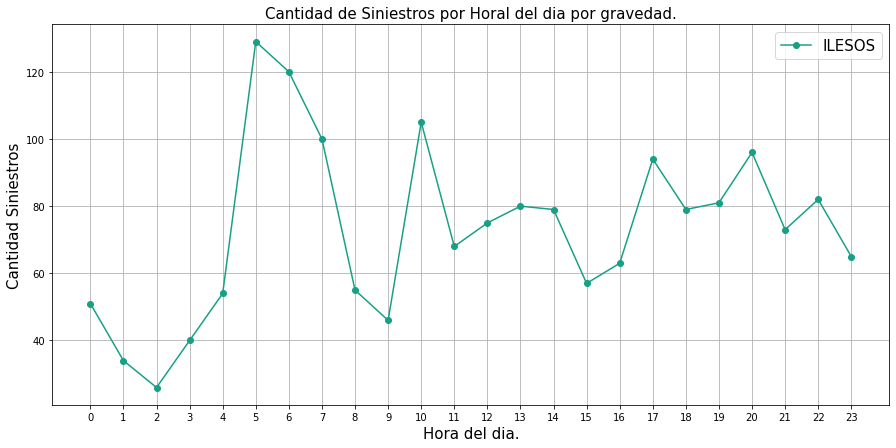

In [223]:
plt.figure(figsize=(15,7))
lstgravedad = np.array(['ILESOS','HERIDO VALORADO','HERIDO HOSPITA.','MUERTOS'])
#plt.plot(gphrg1['HORA_PROCESADA'], gphrg1['CANTIDAD'],color='#FF5733', marker = 'o', markerfacecolor = '#FF5733')
#plt.plot(gphrg2['HORA_PROCESADA'], gphrg2['CANTIDAD'], color='#8E44AD', marker = 'o', markerfacecolor = '#8E44AD')
#plt.plot(gphrg3['HORA_PROCESADA'], gphrg3['CANTIDAD'], color='#3498DB', marker = 'o', markerfacecolor = '#3498DB')
plt.plot(gphrg4['HORA_PROCESADA'], gphrg4['CANTIDAD'], color='#16A085', marker = 'o', markerfacecolor = '#16A085')
plt.legend(lstgravedad, fontsize=15)
plt.ylabel('Cantidad Siniestros', fontsize=15)
plt.xlabel('Hora del dia.', fontsize=15)
plt.title('Cantidad de Siniestros por Horal del dia por gravedad.', fontsize=15)
plt.xticks(lsthora)
plt.grid()
plt.show()
plt.close()

#### Por embriaguez

In [224]:
gphr = dfsiniestros.groupby(['HORA_PROCESADA','CON_EMBRIAGUEZ'])['HORA_PROCESADA'].count().reset_index(name='CANTIDAD')
gphrce = gphr[gphr['CON_EMBRIAGUEZ'] == 1]
gphrcse = gphr[gphr['CON_EMBRIAGUEZ'] == 2]

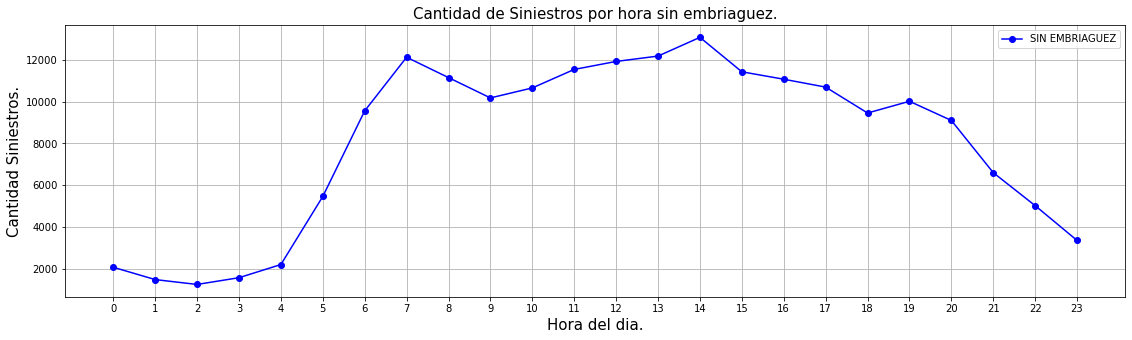

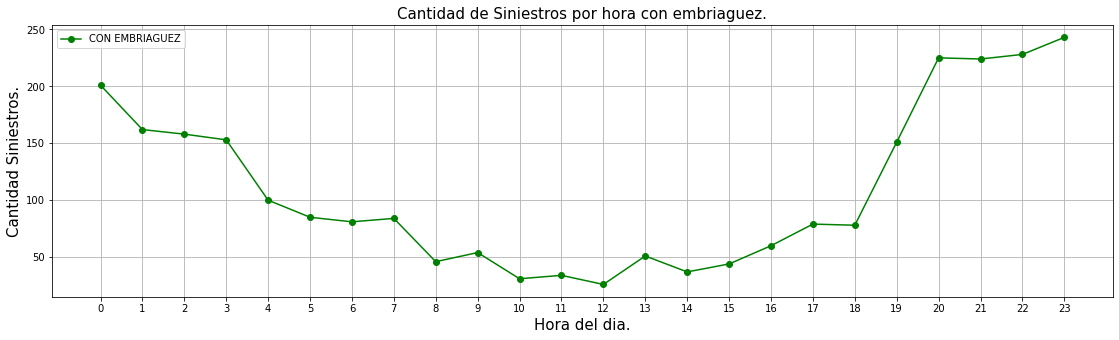

In [236]:
# Sin Embriaguez
plt.figure(figsize=(19,5))
plt.plot(gphrcse['HORA_PROCESADA'],gphrcse['CANTIDAD'], 'bo-')
plt.legend(['SIN EMBRIAGUEZ'])
plt.ylabel('Cantidad Siniestros.', fontsize=15)
plt.xlabel('Hora del dia.', fontsize=15)
plt.title('Cantidad de Siniestros por hora sin embriaguez.', fontsize=15)
plt.xticks(lsthora)
plt.grid()
plt.show()
plt.close()
#Embriaguez
plt.figure(figsize=(19,5))
plt.plot(gphrce['HORA_PROCESADA'],gphrce['CANTIDAD'], 'go-')
plt.legend(['CON EMBRIAGUEZ'])
plt.ylabel('Cantidad Siniestros.', fontsize=15)
plt.xlabel('Hora del dia.', fontsize=15)
plt.title('Cantidad de Siniestros por hora con embriaguez.', fontsize=15)
plt.grid()
plt.xticks(lsthora)
plt.show()
plt.close()

### Modificacion de campos del dataframe
#### Creación de columna *MES*
- Se crea una columna ```MES``` a partir de la fecha, ya que se conocio en el analisis la importante relación de los meses con relacion a los siniestros.

In [226]:
dfsiniestros['MES'] = dfsiniestros['FECHA'].dt.month

#### Eliminación de campos

In [227]:
del dfsiniestros['FECHA']

In [228]:
del dfsiniestros['DIRECCION']

### Comprobación de campos de ```dfsiniestros```
- Columnas
- Tamaño
- Tipo de datos

In [229]:
dfsiniestros.columns

Index(['DIA_PROCESADO', 'EDAD_PROCESADA', 'LLEVACINTURON', 'LLEVACHALECO',
       'LLEVACASCO', 'SEXO', 'MODELOVEHICULO', 'CLASEVEHICULO',
       'POSSESEGURORESPONSABILIDAD', 'CON_EMBRIAGUEZ', 'CON_HUECOS',
       'LOCALIDAD', 'HORA_PROCESADA', 'GRAVEDAD', 'MES'],
      dtype='object')

In [230]:
dfsiniestros.shape

(195740, 15)

In [231]:
dfsiniestros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195740 entries, 0 to 203190
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   DIA_PROCESADO               195740 non-null  int64
 1   EDAD_PROCESADA              195740 non-null  int64
 2   LLEVACINTURON               195740 non-null  int64
 3   LLEVACHALECO                195740 non-null  int64
 4   LLEVACASCO                  195740 non-null  int64
 5   SEXO                        195740 non-null  int64
 6   MODELOVEHICULO              195740 non-null  int64
 7   CLASEVEHICULO               195740 non-null  int64
 8   POSSESEGURORESPONSABILIDAD  195740 non-null  int64
 9   CON_EMBRIAGUEZ              195740 non-null  int64
 10  CON_HUECOS                  195740 non-null  int64
 11  LOCALIDAD                   195740 non-null  int64
 12  HORA_PROCESADA              195740 non-null  int64
 13  GRAVEDAD                    195740 non-null 

### Exportacion de datos preparados para el trainning

In [232]:
dfsiniestros.to_csv(URL_PREPARED_DATA+'/siniestros-train.csv', index = False)

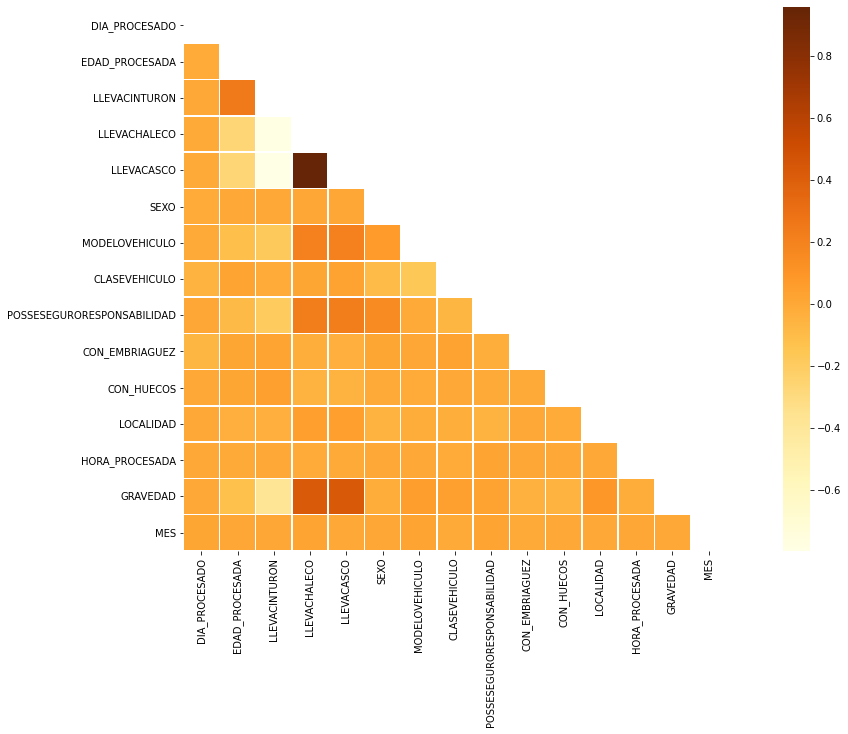

In [233]:
#Obtenemos la matriz de correlacion del dataframe
correlacion = dfsiniestros.corr()
# Genera una mascara triangular superior
mask = np.zeros_like(correlacion, dtype = bool)
mask[np.triu_indices_from(mask)] = True

#Configuramos la figura de mathplotlib
f, ax = plt.subplots(figsize=(20,10))

#Creamos el heatmap a partir de la correlacion onbtenida
sns.heatmap(correlacion, mask=mask,square=True, linewidths = .5, ax=ax, cmap='YlOrBr') # cmap='BuPu'
#plt.savefig('prueba')
plt.show()